In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
# 加载附件1、附件2、附件3和附件4的数据
file_path_1 = './C题/附件1.xlsx'
file_path_2 = './C题/附件2.xlsx'
file_path_3 = './C题/附件3.xlsx'
file_path_4 = './C题/附件4.xlsx'

# 读取数据
data_1 = pd.read_excel(file_path_1)
data_2 = pd.read_excel(file_path_2)
data_3 = pd.read_excel(file_path_3)
data_4 = pd.read_excel(file_path_4)

# 显示每个数据文件的前几行以了解数据结构
data_1.head(), data_2.head(), data_3.head(), data_4.head()

(              单品编码    单品名称        分类编码 分类名称
 0  102900005115168    牛首生菜  1011010101  花叶类
 1  102900005115199   四川红香椿  1011010101  花叶类
 2  102900005115625  本地小毛白菜  1011010101  花叶类
 3  102900005115748     白菜苔  1011010101  花叶类
 4  102900005115762      苋菜  1011010101  花叶类,
         销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型 是否打折销售
 0 2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售      否
 1 2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售      否
 2 2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售      否
 3 2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售      否
 4 2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售      否,
           日期             单品编码  批发价格(元/千克)
 0 2020-07-01  102900005115762        3.88
 1 2020-07-01  102900005115779        6.72
 2 2020-07-01  102900005115786        3.19
 3 2020-07-01  102900005115793        9.24
 4 2020-07-01  102900005115823        7.03,
       

In [4]:
data_1.head()

,单品编码,单品名称,分类编码,分类名称
0,102900005115168,牛首生菜,1011010101,花叶类
1,102900005115199,四川红香椿,1011010101,花叶类
2,102900005115625,本地小毛白菜,1011010101,花叶类
3,102900005115748,白菜苔,1011010101,花叶类
4,102900005115762,苋菜,1011010101,花叶类


In [5]:
# 合并附件1和样本数据，以获取每个单品的分类信息
merged_data = pd.merge(data_2, data_1, how='left', on='单品编码')

In [6]:
# 计算各单品和品类的销售量分布
average_sales_by_item = merged_data.groupby('单品名称')['销量(千克)'].mean()
std_sales_by_item = merged_data.groupby('单品名称')['销量(千克)'].std()

average_sales_by_category = merged_data.groupby('分类名称')['销量(千克)'].mean()
std_sales_by_category = merged_data.groupby('分类名称')['销量(千克)'].std()

# 计算销售量的Z-score，以观察哪些单品或品类的销售量异常
merged_data['销量_zscore'] = zscore(merged_data['销量(千克)'])

print('单品销售量分布')
print(average_sales_by_item, std_sales_by_item), average_sales_by_category, std_sales_by_category, merged_data

单品销售量分布
单品名称
七彩椒(1)      0.305682
七彩椒(2)      0.349748
七彩椒(份)      1.000000
上海青         0.457027
上海青(份)      0.999674
              ...   
黑牛肝菌        0.271000
黑牛肝菌(盒)     1.000000
黑皮鸡枞菌       0.165571
黑皮鸡枞菌(盒)    1.000000
龙牙菜         0.710384
Name: 销量(千克), Length: 246, dtype: float64 单品名称
七彩椒(1)      0.114345
七彩椒(2)      0.123027
七彩椒(份)      0.000000
上海青         0.220773
上海青(份)      0.040355
              ...   
黑牛肝菌        0.056155
黑牛肝菌(盒)     0.000000
黑皮鸡枞菌       0.031015
黑皮鸡枞菌(盒)    0.000000
龙牙菜         0.239708
Name: 销量(千克), Length: 246, dtype: float64


(None,
 分类名称
 水生根茎类    0.691960
 花叶类      0.598012
 花菜类      0.482459
 茄类       0.499617
 辣椒类      0.440338
 食用菌      0.512631
 Name: 销量(千克), dtype: float64,
 分类名称
 水生根茎类    0.551319
 花叶类      0.464645
 花菜类      0.200746
 茄类       0.235216
 辣椒类      0.309362
 食用菌      0.369392
 Name: 销量(千克), dtype: float64,
              销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型  \
 0      2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售   
 1      2020-07-01  09:17:27.295  102900005115960   0.849         3.2   销售   
 2      2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售   
 3      2020-07-01  09:19:45.450  102900005115823   0.421        10.0   销售   
 4      2020-07-01  09:20:23.686  102900005115908   0.539         8.0   销售   
 ...           ...           ...              ...     ...         ...  ...   
 878498 2023-06-30  21:35:13.264  102900005115250   0.284        24.0   销售   
 878499 2023-06-30  21:35:14.358  102900011022764   0.669        12

ADF Statistic: -3.134359219297684
p-value: 0.024112752724217472


/var/folders/x0/_fyb4bw1227f047cqg5wjm5w0000gn/T/ipykernel_11367/301217171.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_item['销售日期'] = pd.to_datetime(df_single_item['销售日期'])
/Users/koschei/Project/MathModel/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/koschei/Project/MathModel/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kosch

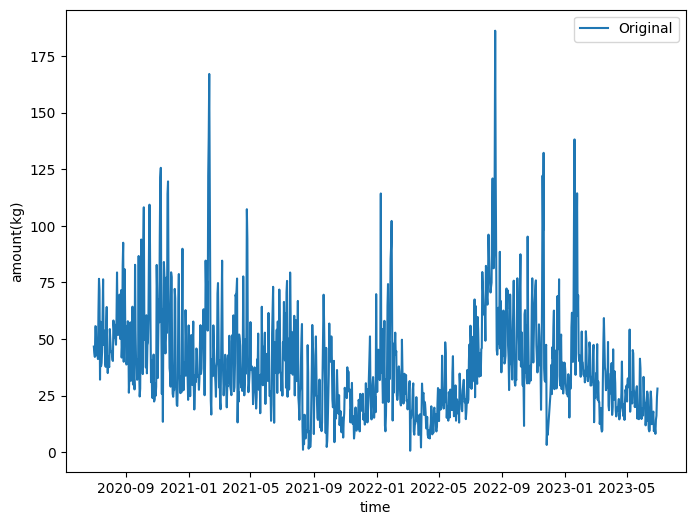

In [29]:
# 创建一个样本数据集，包含销售日期和销售量
# 在实际应用中，这将由您的完整数据集替代
df = pd.DataFrame(merged_data)

# 数据预处理
# 1. 按照销售日期排序
df.sort_values('销售日期', inplace=True)

# 2. 根据单品编码聚合数据，计算每天的总销售量
df_aggregated = df.groupby(['销售日期', '分类名称'])['销量(千克)'].sum().reset_index()

# 对于单一的单品编码（例如101）进行时间序列分析
# df_single_item = df_aggregated[df_aggregated['单品编码'] == 102900005117056]

# 对于单一的品类编码（例如花叶类）进行时间序列分析
df_single_item = df_aggregated[df_aggregated['分类名称'] == '花菜类']

# 平稳性检验（ADF测试）
result = adfuller(df_single_item['销量(千克)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# 如果p-value > 0.05，数据非平稳，需要进行差分等操作
# 如果p-value <= 0.05，数据平稳，可以直接建模

df_single_item['销售日期'] = pd.to_datetime(df_single_item['销售日期'])
df_single_item.set_index('销售日期', inplace=True)

# 使用ARIMA模型进行时间序列分析（这里假设数据已经是平稳的）
model = ARIMA(df_single_item['销量(千克)'], order=(1, 0, 0))  # ARIMA(p, d, q)
model_fit = model.fit()

# 绘制原始数据和拟合数据
plt.figure(figsize=(8, 6))
plt.plot(df_single_item.index, df_single_item['销量(千克)'].values, label='Original')
# plt.plot(df_single_item.index, model_fit.fittedvalues, color='red', label='Fitted')
plt.xlabel('time')
plt.ylabel('amount(kg)')
plt.legend()
# plt.show()
plt.savefig('花菜类时间序列')
# 绘制时间序列图
# plt.figure(figsize=(10, 6))
# plt.plot(df_single_item.index, df_single_item['销量(千克)'], marker='o', linestyle='-')
# plt.title('特定单品（编码101）的销售量时间序列')
# plt.xlabel('销售日期')
# plt.ylabel('销量（千克）')
# plt.grid(True)
# plt.show()

In [20]:
df_single_item.to_excel('花菜类每日销售量.xlsx')

  antecedents consequents  antecedent support  consequent support  support  \
0    (Potato)     (Onion)                 0.8                 0.6      0.6   
1     (Onion)    (Potato)                 0.6                 0.8      0.6   
2    (Potato)    (Burger)                 0.8                 0.6      0.6   
3    (Burger)    (Potato)                 0.6                 0.8      0.6   

   confidence  lift  leverage  conviction  zhangs_metric  
0        0.75  1.25      0.12         1.6            1.0  
1        1.00  1.25      0.12         inf            0.5  
2        0.75  1.25      0.12         1.6            1.0  
3        1.00  1.25      0.12         inf            0.5  


/Users/koschei/Project/MathModel/venv/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


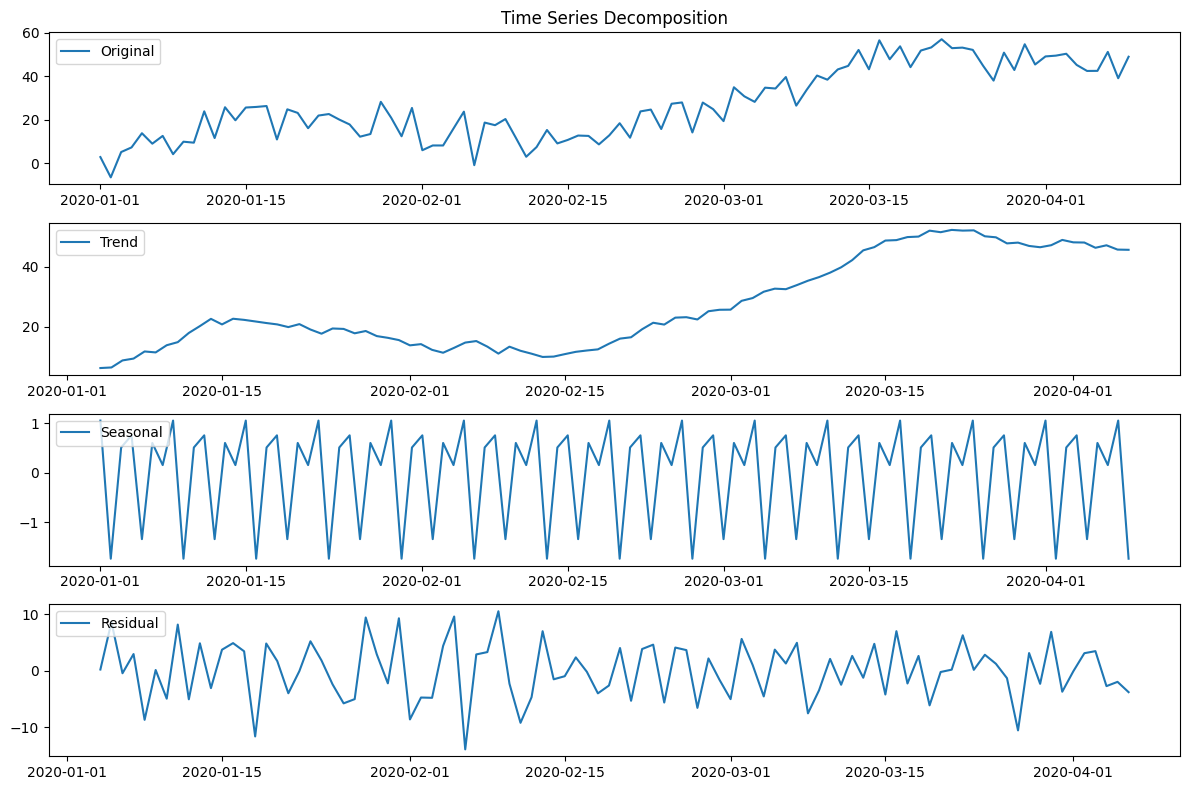

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 创建一个时间序列数据（包括趋势、季节性和噪声）
time = np.arange(0, 100, 1)
y_trend = 0.5 * time
y_seasonal = 10 * np.sin(0.1 * time)
y_noise = 5 * np.random.normal(size=len(time))
y = y_trend + y_seasonal + y_noise

# 创建一个Pandas的时间序列DataFrame
date_rng = pd.date_range(start='1/1/2020', end='4/9/2020', freq='D')
ts_df = pd.DataFrame(y, columns=['value'], index=date_rng)

# 进行时间序列分解
decomposition = seasonal_decompose(ts_df['value'], model='additive')

# 提取各个成分
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 绘制图表
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(ts_df['value'], label='Original')
plt.legend(loc='upper left')
plt.title('Time Series Decomposition')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()